In [42]:
import pandas as pd
df = pd.read_csv('data/taxifare.csv')

In [43]:
import datetime
df['pickup_datetime']=pd.to_datetime(df['pickup_datetime'])-datetime.timedelta(hours=4)

In [44]:
df['Year'] = df['pickup_datetime'].dt.year
df['month'] = df['pickup_datetime'].dt.month
df['day'] = df['pickup_datetime'].dt.day
df['hour'] = df['pickup_datetime'].dt.hour
df['minute'] = df['pickup_datetime'].dt.minute

In [45]:
import numpy as np 
df['mornight'] = np.where(df['hour']<12,0,1)

In [46]:
df.drop(['pickup_datetime'],axis=1,inplace=True)

In [47]:
##we create a function 
def haversine(df):
    '''calculate the great circle distance b/w two points on the earth (specified in decimal degrees)'''
    lat1 = np.radians(df['pickup_latitude'])
    lat2 = np.radians(df['dropoff_latitude'])
    ##based on the formula x1 = dropoff_latitude x2 = dropoff_longitude
    dlat = np.radians(df['dropoff_latitude']-df['pickup_latitude'])
    dlong = np.radians(df['dropoff_longitude']- df['pickup_longitude'])
    a = np.sin(dlat/2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlong/2)**2

    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1-a))
    r = 6371 #radius of earth in kilometeres. use 3956 for miles
    return c*r

In [48]:
df['Total_distance'] = haversine(df)

In [49]:
df = df.drop(['pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude'],axis =1)

In [50]:
X = df.iloc[:,1:]
y =  df.iloc[:,0]

In [51]:
from sklearn.ensemble import ExtraTreesRegressor
import matplotlib.pyplot as plt
model = ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor()

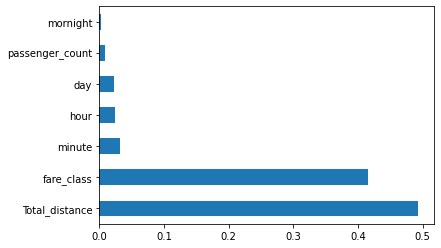

In [11]:
feat_importnaces = pd.Series(model.feature_importances_, index = X.columns)
feat_importnaces.nlargest(7).plot(kind='barh')
plt.show()

In [52]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=100)

In [15]:
X_train.shape

(84000, 9)

In [23]:
y_train.shape

(84000,)

ANN


In [19]:
import tensorflow
from tensorflow.keras.models import *
from tensorflow.keras.layers import *

In [53]:
X_train= X_train.iloc[:15000,:]
X_train.shape

(15000, 9)

In [54]:
y_train= y_train.iloc[:15000]

In [55]:
df.to_csv('final_data.csv',index=False)

In [31]:
n_model = Sequential()
n_model.add(Dense(128,kernel_initializer='normal',input_dim=X_train.shape[1],activation='relu'))

n_model.add(Dense(256, kernel_initializer='normal', activation='relu'))
n_model.add(Dense(256, kernel_initializer='normal', activation='relu'))
n_model.add(Dense(256, kernel_initializer='normal', activation='relu'))

n_model.add((Dense(1, kernel_initializer='normal', activation='linear')))

n_model.compile(loss='mean_absolute_error',optimizer= 'adam', metrics=['mean_absolute_error'])
model_history = n_model.fit(X_train,y_train,validation_split=0.33,batch_size= 10, epochs = 20)

Train on 10049 samples, validate on 4951 samples
Epoch 1/20
10049/10049 [==============================] - 11s 1ms/sample - loss: 3.8167 - mean_absolute_error: 3.8167 - val_loss: 1.9284 - val_mean_absolute_error: 1.9284
Epoch 2/20
10049/10049 [==============================] - 9s 909us/sample - loss: 1.9838 - mean_absolute_error: 1.9838 - val_loss: 1.6128 - val_mean_absolute_error: 1.6128
Epoch 3/20
10049/10049 [==============================] - 10s 991us/sample - loss: 1.9117 - mean_absolute_error: 1.9117 - val_loss: 1.6979 - val_mean_absolute_error: 1.6979
Epoch 4/20
10049/10049 [==============================] - 10s 989us/sample - loss: 1.8741 - mean_absolute_error: 1.8741 - val_loss: 1.6289 - val_mean_absolute_error: 1.6289
Epoch 5/20
10049/10049 [==============================] - 9s 917us/sample - loss: 1.8077 - mean_absolute_error: 1.8077 - val_loss: 2.0019 - val_mean_absolute_error: 2.0019
Epoch 6/20
10049/10049 [==============================] - 11s 1ms/sample - loss: 1.8059 - 

In [32]:
prediction = n_model.predict(X_test)

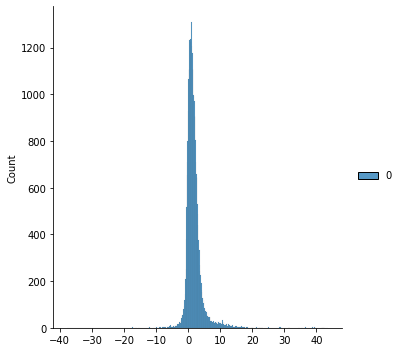

In [33]:
import seaborn as sns
sns.displot(y_test.values.reshape(-1,1)-prediction)

In [34]:
from sklearn import metrics
print('mse',metrics.mean_squared_error(y_test,prediction))
print('mae',metrics.mean_absolute_error(y_test,prediction))
print('r2',metrics.r2_score(y_test,prediction))
print('rmse',np.sqrt(metrics.mean_squared_error(y_test,prediction)))

mse 12.506404545271375
mae 2.0694266033212343
r2 0.7813790193099661
rmse 3.536439529423821
